## IN THIS PROJECT WE ARE MAKING A MODEL THAT CAN PREDICT HAND WRITTEN DIGITS.

## [1] LODING LIBRARIES

In [2]:
# IMPORTING LIBRARIES AND DATA SET

import tensorflow
import tensorflow.keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

In [3]:
# TOTAL IMAGES CONTAINS 70K IMAGES (60K IN TRAINING & 10K IN TESTING)
# 10 NUMBERS FROM 0 TO 9

mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

In [4]:
# SPLITING DATA SET INTO TRAIN AND TEST
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# PRINT SHAPE OF AN 1ST IMAGE
x_train[0].shape

(28, 28)

## [2] HERE WE ARE PLOTTING SAMPLE IMAGE OF OUR MNIST DATA SET

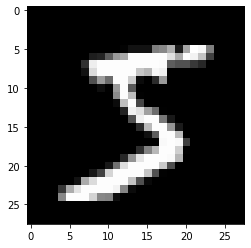

In [5]:
# PLOTTING LIBRARY
import matplotlib.pyplot as plt
%matplotlib inline

# PICK 1ST IMAGE TO PLOT
sample = 0
image = x_train[sample]

# PLOTTING 1ST IMAGE
fig = plt.figure
plt.imshow(image, cmap='gray')
plt.show()

## [3] DATA PREPROCESSING

In [6]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

# convert class vectors to binary class matrices
y_train = tensorflow.keras.utils.to_categorical(y_train, num_classes)
y_test = tensorflow.keras.utils.to_categorical(y_test, num_classes)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


### [4] CREATING CONVOLUTION MODEL

In [9]:
input_shape = (28, 28, 1)
batch_size = 128
num_classes = 10
epochs = 30

model = Sequential()
    
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
    
model.compile(loss=tensorflow.keras.losses.categorical_crossentropy,
              optimizer=tensorflow.keras.optimizers.Adadelta(),metrics=['accuracy'])

In [10]:
    hist = model.fit(x_train, y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_test, y_test))
    print("The model has successfully trained")
    model.save('mnist.h5')
    print("Saving the model as mnist.h5")

Epoch 1/30
469/469 [==============================] - 8s 16ms/step - loss: 2.2688 - accuracy: 0.1745 - val_loss: 2.2016 - val_accuracy: 0.4344
Epoch 2/30
469/469 [==============================] - 7s 16ms/step - loss: 2.1574 - accuracy: 0.3454 - val_loss: 2.0617 - val_accuracy: 0.6497
Epoch 3/30
469/469 [==============================] - 7s 16ms/step - loss: 2.0113 - accuracy: 0.4834 - val_loss: 1.8730 - val_accuracy: 0.7064
Epoch 4/30
469/469 [==============================] - 7s 15ms/step - loss: 1.8151 - accuracy: 0.5754 - val_loss: 1.6296 - val_accuracy: 0.7409
Epoch 5/30
469/469 [==============================] - 7s 15ms/step - loss: 1.5807 - accuracy: 0.6331 - val_loss: 1.3589 - val_accuracy: 0.7724
Epoch 6/30
469/469 [==============================] - 7s 15ms/step - loss: 1.3512 - accuracy: 0.6661 - val_loss: 1.1121 - val_accuracy: 0.7942
Epoch 7/30
469/469 [==============================] - 7s 15ms/step - loss: 1.1557 - accuracy: 0.6974 - val_loss: 0.9212 - val_accuracy: 0.8167

### [5] EVALUTE MODEL 

In [40]:
score = model.evaluate(x_test, y_test, verbose=0)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.1154482513666153
Test accuracy: 0.9659000039100647
